In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [164]:
df = pd.read_csv("prediksi-nilai.csv", sep=';')
le = LabelEncoder()
df['Huruf'] = le.fit_transform(df['Huruf'])

In [165]:
df

,UTS,UAS,Harian,Huruf
0,37,8,72,4
1,0,0,0,4
2,17,18,103,2
3,7,0,109,3
4,27,35,128,1
5,78,24,99,1
6,27,22,104,2
7,15,18,108,2
8,35,8,88,3
9,65,30,130,0


In [166]:
x_train = df.drop(["Huruf"], axis = 1)
x_train.head()

,UTS,UAS,Harian
0,37,8,72
1,0,0,0
2,17,18,103
3,7,0,109
4,27,35,128


In [167]:
y_train = df["Huruf"]
y_train.head()

0    4
1    4
2    2
3    3
4    1
Name: Huruf, dtype: int32

In [168]:
df1 = pd.read_csv("prediksi.csv", sep=';')

In [169]:
df1

,UTS,UAS,Harian,Huruf
0,4,40,100,NaN


In [170]:
x_test = df1.drop(["Huruf"], axis = 1)
x_test.head()

,UTS,UAS,Harian
0,4,40,100


In [171]:
y_test = df1["Huruf"]
y_test.head()

0   NaN
Name: Huruf, dtype: float64

In [172]:
nb = GaussianNB()

In [173]:
nb_train = nb.fit(x_train, y_train)

In [174]:
y_pred = nb_train.predict(x_test)
y_pred

array([2])

In [175]:
#Confusion Matrix
y_train_pred = nb_train.predict(x_train)
y_train_pred

array([3, 4, 2, 2, 1, 1, 2, 2, 3, 0, 1, 3, 1, 0, 4, 2, 0, 1, 1, 2, 4, 3,
       2, 2, 1, 2, 3, 4, 4, 3, 3, 2, 4, 0, 4, 4, 1])

In [176]:
confusion_matrix(y_train, y_train_pred)

array([[4, 0, 0, 0, 0],
       [0, 7, 0, 0, 0],
       [0, 1, 9, 0, 0],
       [0, 0, 1, 6, 0],
       [0, 0, 0, 1, 8]], dtype=int64)

<bound method Axes.set_title of <AxesSubplot:xlabel='Predicted label', ylabel='True label'>>

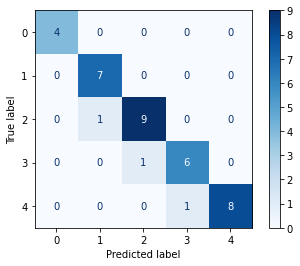

In [177]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(nb, x_train, y_train, cmap=plt.cm.Blues)

disp.ax_.set_title